In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

nm=1e-9 #Nanometros
um=1e-6 #micrometros
mm=1e-3 #Milimetros

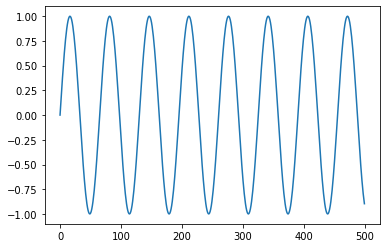

In [17]:
# import matplotlib.pyplot as plt #graficas

nm=1e-9
um=1e-6
mm=1e-3

wave_length=650*nm
wave_range=np.arange(0,5*um,10*nm) #espacio discreto de x,0 hasta 5 micras paso de 10 nanometros
k=2*np.pi/wave_length

onda1D=np.sin(k*wave_range)

plt.plot(onda1D)
plt.show()

In [18]:
FFT_onda1D=np.fft.fftn(onda1D) #transformada de fourier n dimensional
#FFT_onda1D
type(FFT_onda1D[0])

numpy.complex128

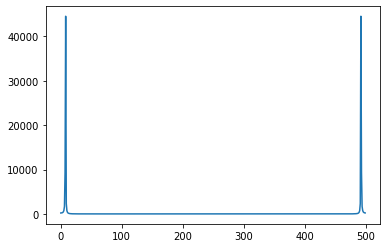

In [19]:
plt.plot(np.abs(FFT_onda1D)**2)


In [20]:
def ploteo_complejo(mat,indicador,escala):#funcion de ploteo completo 
    #mat=mat. completa que voy a pltear
    #indicador=I para intensidad, A amplitud, P fase
    #escala=1 para nada , 0 para Logaritmica
    if(indicador=="I"): #intensidad
      mat=np.abs(mat)**2 #modulado cuadro
    
    elif(indicador=="A"): #amplitud
      mat=np.abs(mat)
    
    elif(indicador=="P"):
      mat=np.angle(mat)
        

    if(escala==1):  #escala en caso de si no se ve
        plt.figure()
        plt.imshow(mat)
        plt.show()
    else:
        plt.figure()
        plt.imshow(np.log(mat+0.00001)) #escala logaritmica
        plt.show()


In [21]:
np.shape(cv2.imread("b.png",0)) #dimensiones de imagen 0 es escala de grises

(768, 768)

In [22]:

plt.figure()
plt.imshow(np.absftt_img)
plt.show()


AttributeError: module 'numpy' has no attribute 'absftt_img'

<Figure size 432x288 with 0 Axes>

In [ ]:
img=cv2.imread("b.png",0)#escala de grises

fft_img_prev=np.fft.fftn(img)
fft_img_prev1=np.fft.fftshift(fft_img_prev)
im_o=np.fft.ifftn(fft_img_prev1)
x=ploteo_complejo(im_o,"A",0) #observo intensidad

In [ ]:
#mascaras
#np.zeros((1065,1024) otra tamaño
mask=np.zeros(np.shape(img),dtype="uint8") #matriz de ceros con tamalo de matriz
cv2.rectangle(mask,(50,15),(200,300),10,-1) #10 es el numero de pixeles 1 es borde, -1 es rellenar
plt.figure()
plt.imshow(mask)
plt.show()


In [ ]:
np.shape(img) #imprime numero de filas primero y luego numero de columnas

In [ ]:
#mascaras circulares
mask2=np.ones(np.shape(img),dtype="uint8") #matriz de 1 #entero de 8 bits o un bit


coord=int(np.shape(img)[0]/2) #cuadrada, para circular debe usar 2 coordenadas

print(coord)

cv2.circle(mask2,(coord,coord),20,0,-1) #tamaño del radio y cero

plt.figure()
plt.colorbar
plt.imshow(mask2)
plt.show()

In [ ]:
imagen= cv2.imread("b.png",0)

fft_imagen=np.fft.fftn(imagen)
fft_imagen1=np.fft.fftshift(fft_imagen)



new_img=np.fft.fftn(mask2*fft_imagen)

In [ ]:
cv2.imshow("Resultado",new_img)
cv2.waitKey(0)
cv2.DestroyAllWindows()

In [ ]:
ploteo_complejo(new_img,"I",1)

In [ ]:
plt.figure()
plt.imshow(np.abs(new_img)**2) #filtro de bajas frecuencias, las altas quedan en las esquinas
plt.show()

In [ ]:
x=np.arange(-50,51) #el centro queda en la mitad de la malla1
y=np.arange(-50,51)
##x=[1,2,3,4]
#y=[3,4,5,6]

X,Y=np.meshgrid(x,y) #arreglo

In [ ]:
print(X)


In [ ]:
X=X*1e-3
Y=Y*1e-3 #milimetros

In [ ]:
#UN RADIO EN ESAS COORDENADAS

radio=np.sqrt(X**2+Y**2)

In [ ]:
np.shape(radio)

In [ ]:
plt.figure() #ploteo de la matriz obtenida se podria hacer para la matriz del punto A
plt.imshow(radio)
plt.colorbar
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as im
import numpy as np
import time

In [ ]:
start = time.time()

In [ ]:
#sinusoide de frecuencias frec_x, frec_y y dim ancho x alto
def _im_sen(frec_x,frec_y, ancho, alto):
    #Crea una malla cuadrada ancho x alto
    #columnas (Anchura)
    x = np.linspace( 0, 1.0, ancho)
    #filas    (Altura)
    y = np.linspace( 0, 1.0, alto)
    [X,Y] = np.meshgrid(x,y)
    return np.sin(2*np.pi*frec_x*X + 2*np.pi*frec_y*Y)

In [ ]:
#imagen sinusoidal fx=5.5, fy=3.0
imagen_seno_oblicuo = _im_sen(5.5,3.0,768,768)

In [ ]:
#guardar imagen seno oblicuo
im.imsave('C:/Users/gafut/instrumentosOpticos/imagen_seno_oblicuo.png', imagen_seno_oblicuo, cmap='gray')

In [ ]:
plt.figure()
plt.imshow(imagen_seno_oblicuo, extent=[0,1,0,1],cmap='gray')
plt.show()

In [ ]:
#Operacion de complejos , inversa para verificar
import numpy as np
import cv2

img1=cv2.imread("b.png",0)
img2=cv2.imread("imagen_seno_oblicuo.png",0)


imagen_fuente_1_float = np.asarray(img1,dtype=np.float32)
imagen_fuente_2a_float =  np.asarray(img2,dtype=np.float32)
#bajar la imagen 2 a (256,256)
imagen_fuente_2_float =imagen_fuente_2a_float[:,:,0]


fft_img1=np.fft.fftn(img1,float,norm="ortho")
ftt_imagen_centrada_2=np.fft.fftshift(fft_img1)
#espectro magnitud con compresión del rango dinámico
#para la mejor visualización
magnitudFFT_2 = np.log(1 + np.abs(ftt_imagen_centrada_2))



In [ ]:
#ahora si operacion 
new_i=np.fft.ifftn(img2*ftt_img1)


In [ ]:
ploteo_complejo(new_i,"I",1);


In [ ]:
plt.figure()
plt.imshow(img)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as im
import numpy as np
import time
import cv2
imagen= cv2.imread("b.png")
cv2.imshow("Imagen del 21",imagen)


In [ ]:
kernel_3x3=np.ones((3,3),np.float32)/9

#filter2D para convolucionar el kernel con la imagen

difun=cv2.filter2D(imagen,-1,kernel_3x3)
cv2.imshow("kernel_3x3",difun)

cv2.waitKey(0)
cv2.destroyAllwindows()

#plt.figure()
#plt.imshow(difun)
#plt.show()

In [ ]:
kernel_3x3=np.ones((7,7),np.float32)/49

#filter2D para convolucionar el kernel con la imagen

difun=cv2.filter2D(imagen,-1,kernel_3x3)
cv2.imshow("kernel_3x3",difun)

cv2.waitKey(0)
cv2.destroyAllwindows()

In [ ]:
import cv2
imagen= cv2.imread("b.png")
blur=cv2.blur(imagen,(3,3))
cv2.imshow("Promediando",blur)

Gaus=cv2.GaussianBlur(imagen,(7,7),0)
cv2.imshow("Kernel",Gaus)

media=cv2.medianBlur(imagen,5)
cv2.imshow("Median blur",media)


cv2.waitKey(0)
cv2.destroyAllwindows()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import cv2




#carga la imágenes y se convierte en arreglo NumPy tipo float
img1 = plt.imread("C:/Users/gafut/instrumentosOpticos/b.png")
img2 = plt.imread("C:/Users/gafut/instrumentosOpticos/imagen_seno_oblicuo.png")

imagen_fuente_1 = cv2.resize(img1, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
imagen_fuente_2 = cv2.resize(img2, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
#convertir los arreglos a float
imagen_fuente_1_float = np.asarray(imagen_fuente_1,dtype=np.float32)
imagen_fuente_2a_float =  np.asarray(imagen_fuente_2,dtype=np.float32)
#bajar la imagen 2 a (256,256)
imagen_fuente_2_float =imagen_fuente_2a_float[:,:,0]



#ya está las dos imágenes preparadas para multiplicarlas
imagen_fuente_producto_float = imagen_fuente_1_float*imagen_fuente_2_float

#norm="ortho": modo normalizado. Escala TF * 1/(sqrt(Weigth x Height)
#transformada de fourier de la imagen 1
FFT_imagen_1 = np.fft.fft2(imagen_fuente_1_float,norm="ortho")
FFT_imagen_centrada_1=np.fft.ifftshift(FFT_imagen_1)
#espectro magnitud con compresión del rango dinámico
#para la mejor visualización
magnitudFFT_1 = np.log(1+np.abs(FFT_imagen_centrada_1))

#norm="ortho": modo normalizado. Escala TF * 1/(sqrt(Weigth x Height)
#transformada de fourier de la imagen 2
FFT_imagen_2 = np.fft.fft2(imagen_fuente_2_float, norm="ortho")
FFT_imagen_centrada_2=np.fft.fftshift(FFT_imagen_2)
#espectro magnitud con compresión del rango dinámico
#para la mejor visualización
magnitudFFT_2 = np.log(1 + np.abs(FFT_imagen_centrada_2))


#norm="ortho": modo normalizado. Escala TF * 1/(sqrt(Weigth x Height)
#transformada de fourier de la imagen producto
FFT_imagen_producto = np.fft.fft2(imagen_fuente_producto_float,norm="ortho")
FFT_imagen_centrada_producto=np.fft.fftshift(FFT_imagen_producto)
#espectro magnitud con compresión del rango dinámico
#para la mejor visualización
magnitudFFT_3 = np.log(1+np.abs(FFT_imagen_centrada_producto))
                                  

#preparar para desplegar resultados
f = plt.figure(figsize=(6,6))
ax1 = f.add_subplot(3, 3, 1)
ax2 = f.add_subplot(3, 3, 2)

ax4 = f.add_subplot(3, 3, 4)
ax5 = f.add_subplot(3, 3, 5)

ax7 = f.add_subplot(3, 3, 7)
ax8 = f.add_subplot(3, 3, 8)



plt.rcParams.update({'font.size':4})


def topografia(imagen, ax):
    ny, nx = imagen.shape
    x = np.linspace(0, 1, nx)
    y = np.linspace(0, 1, ny)
    xv, yv = np.meshgrid(x, y)
    #diferentes formas de desplegar 3D
    #ax.plot_surface(xv,yv,imagen,cmap='afmhot', linewidth=0)
    #ax.plot_wireframe(xv,yv, imagen,rstride=40, cstride=40)
    ax.plot_surface(xv,yv,imagen,rstride=4, cstride=4, cmap=cm.hot)
    #apagar ejes
    ax.axis('off')  
          
    return


ax1.set_title("Imagen 1")
ax1.imshow(imagen_fuente_1, cmap='gray')
#apagar ejes
ax1.axis('off')

ax2.set_title("Magnitud 1")
ax2.imshow(magnitudFFT_1, cmap='gray')
#apagar ejes
ax2.axis('off')




ax4.set_title("Imagen 2")
ax4.imshow(imagen_fuente_2, cmap='gray')
#apagar ejes
ax4.axis('off')


ax5.set_title("Magnitud 2")
ax5.imshow(magnitudFFT_2, cmap='gray')
#apagar ejes
ax5.axis('off')






ax7.set_title("Imagen producto")
ax7.imshow(imagen_fuente_producto_float, cmap='gray')

#apagar ejes
ax7.axis('off')

ax8.set_title("Magnitud producto")
ax8.imshow(magnitudFFT_3, cmap='gray')
#apagar ejes
ax8.axis('off')





f.canvas.set_window_title('Propiedad de modulación de la Transformada de Fourier')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np



#carga la imágenes y se convierte en arreglo NumPy tipo float
imagen_fuente_1 = plt.imread("C:/Users/gafut/instrumentosOpticos/lena.png")
imagen_fuente_2 = plt.imread('imagenes/peinilla_paso_2_2.jpg')
#imagen_fuente_3 =



#convertir los arreglos a float
imagen_fuente_1_float = np.asarray(imagen_fuente_1,dtype=np.float32)
imagen_fuente_2_float =  np.asarray(imagen_fuente_2,dtype=np.float32)


#ya está las dos imágenes preparadas para multiplicarlas
imagen_fuente_producto_float = imagen_fuente_1_float*imagen_fuente_2_float



#norm="ortho": modo normalizado. Escala TF * 1/(sqrt(Weigth x Height)
#transformada de fourier de la imagen 1
FFT_imagen_1 = np.fft.fft2(imagen_fuente_1_float,norm="ortho")
FFT_imagen_centrada_1=np.fft.fftshift(FFT_imagen_1)
#espectro magnitud con compresión del rango dinámico
#para la mejor visualización
magnitudFT_1 = np.log(1+np.abs(FFT_imagen_centrada_1))



#norm="ortho": modo normalizado. Escala TF * 1/(sqrt(Weigth x Height)
#transformada de fourier de la imagen producto
FFT_imagen_producto = np.fft.fft2(imagen_fuente_producto_float,norm="ortho")
FFT_imagen_centrada_producto=np.fft.fftshift(FFT_imagen_producto)
#espectro magnitud con compresión del rango dinámico
#para la mejor visualización
magnitudFFT_2 = np.log(1+np.abs(FFT_imagen_centrada_producto))
#espectro fase
faseFFT_2=np.angle(FFT_imagen_centrada_producto)


#filtrar espectro
#máscara
size =256, 256
mascara = np.zeros(size, dtype=np.uint8)
#mascara[20:105,20:105]=1
mascara[90:165,90:165]=1
magnitudFFT_2_filtrado= np.abs(FFT_imagen_centrada_producto)*mascara

fft_polar= np.abs(magnitudFFT_2_filtrado)*(np.exp(1j*faseFFT_2))
Z1 = np.fft.ifft2(fft_polar,norm="ortho")
imagen_recuperada = np.abs(Z1)

                             

#preparar para desplegar resultados
f = plt.figure(figsize=(6,6))
ax1 = f.add_subplot(2, 2, 1)
ax2 = f.add_subplot(2, 2, 2)
ax3 = f.add_subplot(2, 2, 3)
ax4 = f.add_subplot(2, 2, 4)


plt.rcParams.update({'font.size':4})


ax1.set_title("Magnitud TF de imagen muestreada")
ax1.imshow(magnitudFFT_2, cmap='gray')
#apagar ejes
ax1.axis('off')

ax2.set_title("Imagen muestreada")
ax2.imshow(imagen_fuente_producto_float, cmap='gray')
#apagar ejes
ax2.axis('off')


ax3.set_title("Espectro filtrado")
ax3.imshow(np.log(1+magnitudFFT_2_filtrado),cmap='gray')
#apagar ejes
ax3.axis('off')


ax4.set_title("Imagen recuperada")
ax4.imshow(imagen_recuperada,cmap='gray')
#apagar ejes
ax4.axis('off')


f.canvas.set_window_title('Muestreo de una imagen: Teorema del Muestreo')

plt.show()
